<a href="https://colab.research.google.com/github/Akshay-ramagiri/AI/blob/main/19K41A0555_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

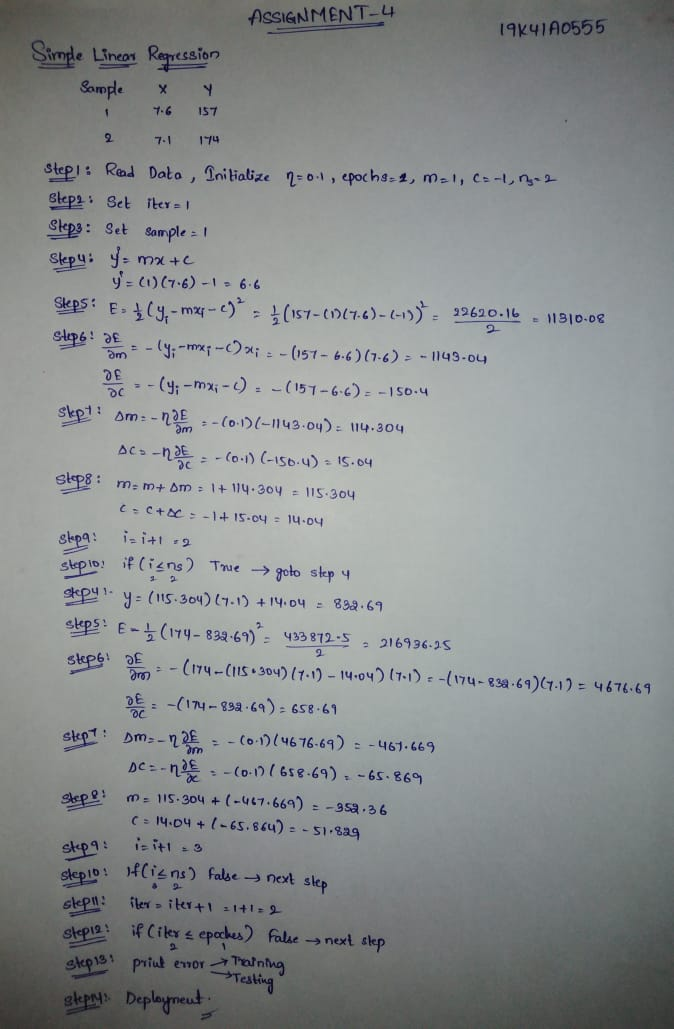

##Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import required libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

##Import Data 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignment_4.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


##Normalization

In [ ]:
xmax = np.max(data['X'])
xmin = np.min(data['X'])
data['X'] = (data['X'] - xmin)/(xmax - xmin)
ymax = np.max(data['Y'])
ymin = np.min(data['Y'])
data['Y'] = (data['Y'] - ymin)/(ymax - ymin)
data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [ ]:
data.isnull().sum()

X    0
Y    0
dtype: int64

##Data Split 

In [ ]:
x = data['X']
y = data['Y']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=101)

##Initialization 

In [ ]:
eeta = 0.001
epochs = 10000
m = np.random.uniform(-10,10)
c = np.random.uniform(-10,10)

##Gradient Calculation 

In [ ]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

##Training Using Stochastic Gradient Descent Optimizer 

In [ ]:
for iter in range(epochs):
  for sample in range(xtrain.shape[0]):
    del_m,del_c=gradient(m, c, xtrain.iloc[sample], ytrain.iloc[sample])
    m=m-eeta*del_m
    c=c-eeta*del_c
print('model parameter m and c',m,c)

model parameter m and c -0.42999526503107666 0.6473074784542513


In [ ]:
ytrainPred = []
for x in xtrain:
  ytrainPred.append(m*x+c)

ytestPred = []
for x in xtest:
  ytestPred.append(m*x+c)

##Training and Testing Error before denormalization 

In [ ]:
MAE_BD_Train = mean_absolute_error(ytrainPred, ytrain) #Training MAE Before Denormalization
MSE_BD_Train = mean_squared_error(ytrainPred, ytrain) #Training MSE Before Denormalization
RMSE_BD_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Training RMSE Before Denormalization
MAE_BD_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE Before Denormalization
MSE_BD_Test = mean_squared_error(ytestPred, ytest) #Testing MSE Before Denormalization
RMSE_BD_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE Before Denormalization
print('Training Error before denormalization :')
print('Mean Absolute Error :', MAE_BD_Train)
print('Mean Squared Error :', MSE_BD_Train)
print('Root Mean Squared Error :', RMSE_BD_Train)
print('\nTesting Error before denormalization :')
print('Mean Absolute Error :', MAE_BD_Test)
print('Mean Squared Error :', MSE_BD_Test)
print('Root Mean Squared Error :', RMSE_BD_Test)

Training Error before denormalization :
Mean Absolute Error : 0.19695731852716022
Mean Squared Error : 0.05126400188569468
Root Mean Squared Error : 0.22641555133359254

Testing Error before denormalization :
Mean Absolute Error : 0.21073890332562117
Mean Squared Error : 0.06451990143626095
Root Mean Squared Error : 0.25400767987653633


##Denormalization 

In [ ]:
xtrain = xtrain * (xmax-xmin) + xmin
ytrain = ytrain * (ymax-ymin) + ymin
xtest = xtest * (xmax-xmin) + xmin
ytest = ytest * (ymax-ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax-ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax-ymin)) + ymin

##Training and Testing Error after denormalization 

In [ ]:
MAE_AD_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE After Denormalization
MSE_AD_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE After Denormalization
RMSE_AD_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE After Denormalization
MAE_AD_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE After Denormalization
MSE_AD_Test = mean_squared_error(ytestPred, ytest) #Testing MSE After Denormalization
RMSE_AD_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE After Denormalization
print('Training Error after denormalization :')
print('Mean Absolute Error :', MAE_AD_Train)
print('Mean Squared Error :', MSE_AD_Train)
print('Root Mean Squared Error :', RMSE_AD_Train)
print('\nTesting Error after denormalization :')
print('Mean Absolute Error :', MAE_AD_Test)
print('Mean Squared Error :', MSE_AD_Test)
print('Root Mean Squared Error :', RMSE_AD_Test)

Training Error after denormalization :
Mean Absolute Error : 44.709311305665366
Mean Squared Error : 2641.582753167962
Root Mean Squared Error : 51.39633015272552

Testing Error after denormalization :
Mean Absolute Error : 47.837731054916006
Mean Squared Error : 3324.64600110909
Root Mean Squared Error : 57.659743331973736


##Analyze training data predictions

In [ ]:
pd.DataFrame({'X_Train':xtrain, 'Y_Train':ytrain, 'Y_Train_Prediction':ytrainPred}).reset_index()

,index,X_Train,Y_Train,Y_Train_Prediction
0,29,8.5,48.0,98.274005
1,26,8.4,35.0,102.922049
2,25,7.7,113.0,135.458357
3,27,7.4,125.0,149.402489
4,33,7.3,87.0,154.050533
5,2,8.2,175.0,112.218137
6,28,7.3,76.0,154.050533
7,19,7.9,155.0,126.162269
8,16,8.5,82.0,98.274005
9,10,8.1,215.0,116.866181


##Analyze testing data predictions 

In [ ]:
pd.DataFrame({'X_Test':xtest,'Y_Test':ytest,'Y_Test_Prediction':ytestPred}).reset_index()

,index,X_Test,Y_Test,Y_Test_Prediction
0,18,8.2,202.0,112.218137
1,7,8.0,190.0,121.514225
2,20,7.6,157.0,140.106401
3,30,7.8,147.0,130.810313


##Plotting the graph 

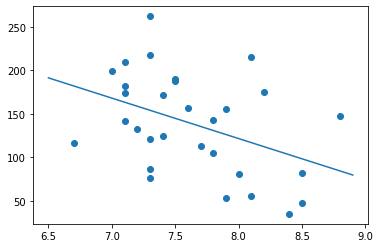

In [ ]:
plt.scatter(np.array(xtrain,xtest), np.array(ytrain,ytest))
x = np.array([i/10 for i in range(65,90)])
y = (m*(x-xmin)/(xmax-xmin)+c) * (ymax-ymin) + ymin
plt.plot(x,y)
plt.show()